<a href="https://colab.research.google.com/github/rodrigoulart/projeto-4-treinamento-rede-yolo/blob/main/projeto_4_treinamento_rede_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar dependências
!apt-get update -qq
!apt-get install -qq build-essential cmake wget unzip libopencv-dev


In [ ]:
# Clonar repositório Darknet
!rm -rf darknet
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet


In [ ]:
# Detectar GPU e configurar Makefile
import os
gpu_available = os.system("nvidia-smi > /dev/null 2>&1") == 0
USE_GPU = 1 if gpu_available else 0
print("GPU detectada" if USE_GPU else "Rodando em CPU (mais lento)")

!sed -i "s/GPU=.*/GPU={USE_GPU}/" Makefile
!sed -i "s/CUDNN=.*/CUDNN={USE_GPU}/" Makefile
!sed -i "s/CUDNN_HALF=.*/CUDNN_HALF={USE_GPU}/" Makefile


In [ ]:
# Compilar Darknet
!make -j8


In [5]:
# Baixar pesos pré-treinados YOLOv4-tiny
!wget -q https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights -O yolov4-tiny.weights



In [6]:
# Baixar imagem de teste
!wget -q https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg -O data/test.jpg


In [ ]:
# Bloco 7 - Executar detecção em imagem de teste
!./darknet detector test cfg/coco.data cfg/yolov4-tiny.cfg yolov4-tiny.weights data/test.jpg -thresh 0.25 -dont_show -out result.json


Detecção concluída. Exibindo resultado...


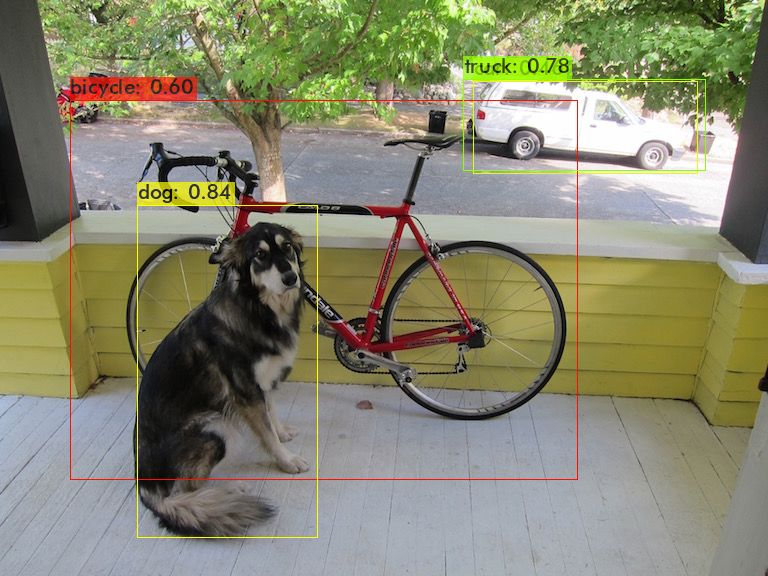

In [8]:
# Exibir resultado no notebook
from IPython.display import Image, display

if os.path.exists("predictions.jpg"):
    print("Detecção concluída. Exibindo resultado...")
    display(Image(filename="predictions.jpg"))
else:
    print("Nenhum resultado gerado. Verifique cfg e pesos.")
